# Week5 Statistical Inference with Python

In week 5, we've covered:
* **Probability Distributions**:
    * Binomial Distribution
    * Beta Distribution
* **Inference**:
    * Estimating a batting average from data
* **Variance**:
    * measuring uncertainty
    * Emprical Bayes estimation

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com) and [Python Documentation](https://docs.python.org/3/contents.html) are your good friends if you have any python questions.

Upload **Week5_Statistical_Inference_With_Python_Homework.ipynb** notebook to your Google Drive and open it with Google Colab

## Probability Distributions  

A probability distribution is a function that gives a probability to any event that might occur in an experiment. The simplest probability distribution is the binomial distribution, which can take on *n* outcomes. A 6-sided dice follows a binomial distribution with 6 possible outcomes, each side having some probability of landing up, and all the probabilities of all the sides sum to 1. An RV example of an event that follows the binomial distribution is the probability of someone converting. We can use the conversion rate, a value between 0 and 1, to describe the probability that any individual will convert. Note that the events will always be 0, didn't convert, or 1, but the conversion rate will take on a rational value between 0 and 1.

For more details of the math of the binomial distribution, watch this Khan Academy video: https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/binomial-random-variables/v/binomial-distribution  

Let's start by simulating some conversion events using python.

In [1]:
import numpy as np

number_of_events = 1
conversion_rate = 0.3
number_of_trials = 10

Above, we have set up some parameters to simulate 10 customers, each with a probability = 3/10 of converting. Before running the below code, make a prediction for how many `1`s you expect to see. After you've written your prediction, run the cell several times and record the output in comments in the cell below.

In [29]:
# TODO: write your prediction here:

sample = np.random.binomial(n = number_of_events, p = conversion_rate, size = number_of_trials)
print(sample)
print("total conversions: ", sample.sum())

[1 1 0 0 1 0 0 0 0 0]
total conversions:  3


In [3]:
# TODO: Write down what you observed. How did your observations compare to your prediction?
#would have assume 3 out of 10 would have converted.
#Each run had a different number of conversions ranging from 1 to 6 after a significant number of runs.

As the number of trials increases, we would expect the actual proportion of 1s to approach the "true" conversion rate,  which in this case is 0.3 by our design. This phenomenon is called the "Law of Large Numbers." In the code block below, create a short experiment that demonstrates this phenomenon.

Note that if you have a numpy array named `sample` you can get its proportion by using `sample.mean()`

[1.0, 0.0, 0.0, 0.5, 0.2, 0.3333333333333333, 0.0, 0.25, 0.4444444444444444, 0.1, 0.09090909090909091, 0.25, 0.38461538461538464, 0.42857142857142855, 0.26666666666666666, 0.1875, 0.4117647058823529, 0.5555555555555556, 0.10526315789473684, 0.3, 0.2857142857142857, 0.22727272727272727, 0.2608695652173913, 0.2916666666666667, 0.28, 0.2692307692307692, 0.2962962962962963, 0.32142857142857145, 0.2413793103448276, 0.3333333333333333, 0.3225806451612903, 0.25, 0.3333333333333333, 0.23529411764705882, 0.3142857142857143, 0.3333333333333333, 0.35135135135135137, 0.34210526315789475, 0.20512820512820512, 0.25, 0.2926829268292683, 0.47619047619047616, 0.2558139534883721, 0.3181818181818182, 0.2, 0.3695652173913043, 0.3404255319148936, 0.25, 0.22448979591836735, 0.24, 0.23529411764705882, 0.34615384615384615, 0.24528301886792453, 0.3333333333333333, 0.2909090909090909, 0.2857142857142857, 0.21052631578947367, 0.25862068965517243, 0.3728813559322034, 0.38333333333333336, 0.22950819672131148, 0.22

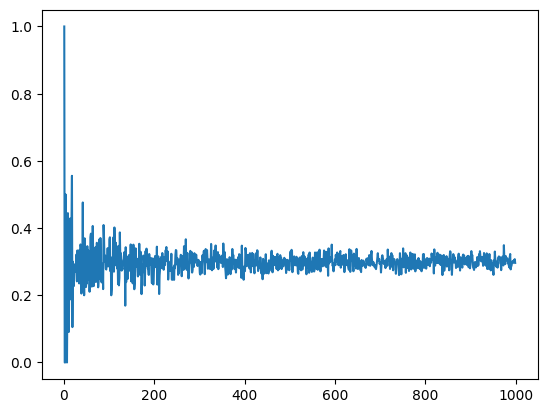

In [4]:
# TODO: Write a short experiment that demonstrates the Law of Large Numbers.
true_conversion_rate = 0.3
num_trials = 1000
sample_Mean = []

for i in range(1, num_trials):
    sample = np.random.binomial(n = 1, p = conversion_rate, size = i)
    # Calculate the proportion of 1s in the sample
    mean = sample.mean()
    sample_Mean.append(mean)
print(sample_Mean)

import matplotlib.pyplot as plt

plt.plot(range(1, num_trials), sample_Mean)

## Inference  

In the above, we were told the true conversion rate by some all-knowing oracle, and then we explored how conversions might play out over a set of *n* trials. Typically, we are tasked with the reverse problem. That is, we are given access to some observed data, and asked to infer what the true conversion rate is. This process is called "statistical inference" and it is a core concept to all of data science and machine learning. We will spend some time over the next weeks developing your python skills to explore statistical inference.  

We will be leveraging a well known data science communicator, David Robinson, and will read the first four articles of this series: http://varianceexplained.org/r/simulation-bayes-baseball/  

The coding language of the series is R, a statistical programming language, but you will be asked to recreate and explore some of the ideas here in python. Let's start by understanding a second probability distribution, the beta distribution. This probability distribution is closely related to the binomial distribution we explored above. In short, it can be used to describe what the probability of the true conversion rate is, given some data. Read more about it in the first article of the series: http://varianceexplained.org/statistics/beta_distribution_and_baseball/

### Exercises  

1. In the code block below, write a short simulation that samples batting averages from a Beta Distribution with parameters $\alpha = 81$ and $\beta = 219$ You will likely find this numpy method to be helpful: https://numpy.org/doc/stable/reference/random/generated/numpy.random.beta.html

0.26959142203106046


(array([  8.,  38., 137., 255., 261., 172.,  87.,  38.,   3.,   1.]),
 array([0.19351858, 0.21118051, 0.22884244, 0.24650437, 0.26416629,
        0.28182822, 0.29949015, 0.31715208, 0.33481401, 0.35247594,
        0.37013787]),
 <BarContainer object of 10 artists>)

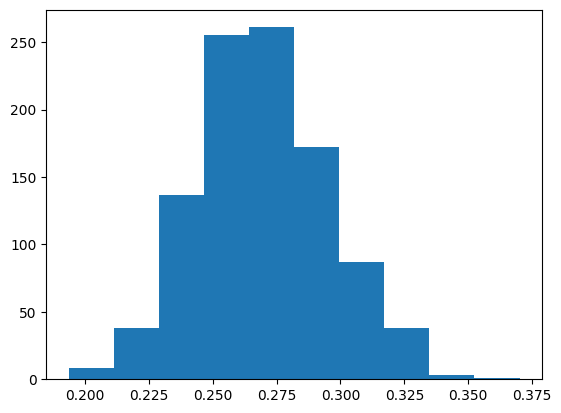

In [5]:
# TODO

a = 81
b = 219

batting_avg = np.random.beta(a, b, 1000)
print(batting_avg.mean())

plt.hist(batting_avg)

<ipython-input-9-6f6cf76fb05f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=batting_avg)


<Axes: ylabel='Density'>

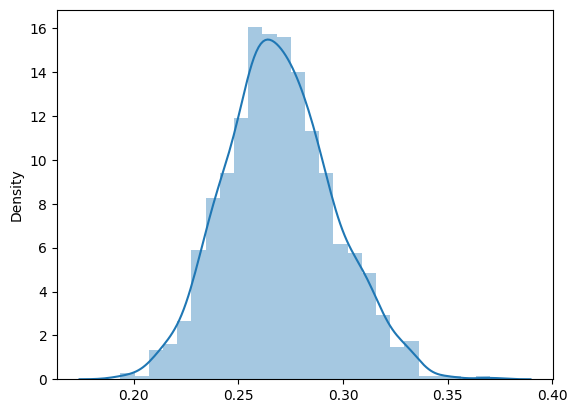

In [9]:
import seaborn as sns
sns.distplot(a=batting_avg)

2. What are the lowest and highest batting averages from your experiment? What is the median batting average from your experiment? How does the median batting average from your experiment relate to the parameters alpha=81 and beta=219?

In [10]:
# TODO
print(np.min(batting_avg))
print(np.max(batting_avg))
print(np.median(batting_avg))
#batting average from a and b
print(a/(a+b))

0.1935185787559509
0.3701378691761867
0.268284780826178
0.27


3. Sample a single batting average from your experiment at random, and then use that batting average to simulate 300 at bats. Give a statistical summary of the 300 at bats.

    Hint: When you have a single probablity of success (p) and a sequence of 300 Bernoulli(p) trials, what distribution should you sample from?

    Hint: What is a statistical summary? What 2 values can I usually use to describe a probability distribution?

In [11]:
# TODO

random_batting_average = np.random.choice(batting_avg)
print(random_batting_average)
at_bats = np.random.binomial(1, random_batting_average, size=300)

print("min", np.min(at_bats))
print("max", np.max(at_bats))
print("median", np.median(at_bats))
print("mean", np.mean(at_bats))
print("standard deviation", np.std(at_bats))


0.2401637977146397
min 0
max 1
median 0.0
mean 0.18
standard deviation 0.38418745424597095


4. As in the article, lets start with the $Beta(81, 219)$ distribution as the starting point of our estimate for a player's batting average at the start of a season. Then we will simulate a 300 at-bat season where a player gets 100 hits.

    We will use the 300 new data points to *update* our initial best guess based on the prior information $Beta(81, 219)$

    Finally, we will analyze our updated estimate for the batting average of the simulated player at the end of the season. Fill in the code below to complete the above.

In [12]:
# constants, the initial parameters of the beta distribution
ALPHA0 = 81
BETA0 = 219
INITIAL_BETA = dict(alpha=ALPHA0, beta=BETA0)

def update_beta(alpha0, beta0, hits, at_bats):
    '''
    Parameters:
        alpha0, int: the initial number of success
        beta0, int: the initial number of failures
        hits, int: the number of hits
        at_bats, int: the number of at bats

    Return:
        dictionary with two members alpha and beta, each representing the updated successes and failures respectively.
    '''
    # TODO FILL IN THE CODE
    Alphaupdate = ALPHA0 + hits
    Betaupdate = BETA0 + at_bats-hits
    update_beta = dict(alpha=Alphaupdate, beta = Betaupdate)
    return update_beta

# unit test. If you've written your function correctly, the following code should give the expected outputs
hits = 100
at_bats = 300

updated_beta = update_beta(alpha0 = ALPHA0, beta0 = BETA0, hits = hits, at_bats = at_bats)
print(updated_beta['alpha']) # should equal 181
print(updated_beta['beta']) # should equal 419

181
419


Using code and text, give a brief statistical analysis of the updated probability distribution. If the manager asked you to give an estimate for the player's batting average at the end of the season, what answer would you give?

0.3016666666666667
mean 0.30118080951735005


<ipython-input-30-4ff6e8a3f9d3>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=batting_avg, label='Original')
<ipython-input-30-4ff6e8a3f9d3>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=batting_avg_new, label='New')


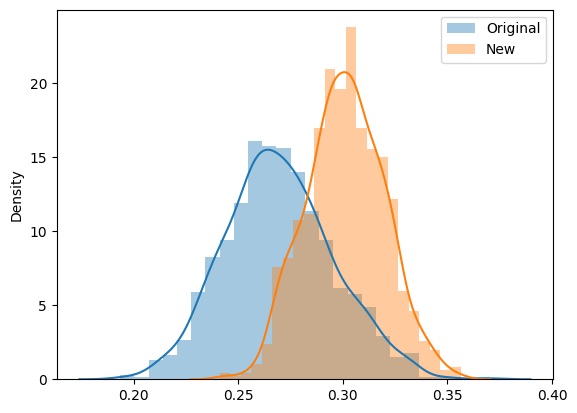

min 0.24116906538478827
max 0.35643590723006563
median 0.301379659236436
mean 0.30118080951735005
standard deviation 0.01865444133960703


In [30]:
# TODO: Code

p = updated_beta['alpha']/ (updated_beta['alpha'] + updated_beta['beta'])
print(p)

batting_avg_new = np.random.beta(updated_beta['alpha'], updated_beta['beta'], 1000)
print("mean", np.mean(batting_avg_new))

import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(a=batting_avg, label='Original')
sns.distplot(a=batting_avg_new, label='New')
plt.legend()
plt.show()

#at_bats = np.random.binomial(1, p, size=300)

print("min", np.min(batting_avg_new))
print("max", np.max(batting_avg_new))
print("median", np.median(batting_avg_new))
print("mean", np.mean(batting_avg_new))
print("standard deviation", np.std(batting_avg_new))

TODO: Text

## Variance  

So far, we've done some work to understand probability distributions, but we haven't taken advantage of the most important part - variance. Variance is a measure of uncertainty, it's a way to quantify everything you might *not* know about your estimate. Read the second article to begin to understand how variance can be used to leverage uncertainty: http://varianceexplained.org/r/empirical_bayes_baseball/

In [14]:
import pandas as pd

# prepare the dataset
batting_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv'
pitching_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Pitching.csv'
people_url = 'https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv'

batting = pd.read_csv(batting_url)
pitching = pd.read_csv(pitching_url)
master = pd.read_csv(people_url)

print(master.shape)
print(pitching.shape)
print(batting.shape)

print(batting["playerID"].nunique())
print(pitching["playerID"].nunique())

master.columns

(20894, 24)
(50402, 30)
(112184, 22)
20469
10384


Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

### Exercises  

5. Use pandas methods to recreate the `career` data set from the article. You may find the pandas docs useful: https://pandas.pydata.org/pandas-docs/version/0.25.3/#  

    Focus on the logical steps taken in the article text and R code and create the appropriate pandas syntax.

In [23]:
# TODO: recreate career dataframe
#create batting average from batting data
#batting_Avg = batting[["playerID","H","AB"]].groupby(by=batting["playerID"]).sum()
#batting_Avg["batting_Avg"] = batting_Avg["H"]/batting_Avg["AB"]

#batting_Avg.columns

#remove pitcher data from the batting data
pitching = pitching[["playerID"]]
batting = batting.loc[batting["AB"]>0]

removepitcher = pd.merge(batting, pitching, how='outer', indicator=True)
removepitcher = removepitcher[removepitcher['_merge'] == 'left_only']

# batting average

batting_Avg = removepitcher[["playerID","H","AB"]].groupby(by=removepitcher["playerID"]).sum()
batting_Avg["batting_Avg"] = batting_Avg["H"]/batting_Avg["AB"]
batting_Avg = batting_Avg.reset_index()

#merge master back in to get name information
master = master[["playerID","nameFirst", "nameLast"]]
career = pd.merge(batting_Avg, master, how="inner", on =["playerID","playerID"])

career["Full_Name"] = career["nameFirst"].str.cat(career["nameLast"],sep = " ")
career = career.drop(columns=["playerID", "nameLast", "nameFirst"], axis=1)
career



<ipython-input-23-7e4f2c9bcfeb>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  batting_Avg = removepitcher[["playerID","H","AB"]].groupby(by=removepitcher["playerID"]).sum()


,H,AB,batting_Avg,Full_Name
0,3771.0,12364.0,0.304998,Hank Aaron
1,216.0,944.0,0.228814,Tommie Aaron
2,2.0,21.0,0.095238,Andy Abad
3,11.0,49.0,0.224490,John Abadie
4,772.0,3044.0,0.253614,Ed Abbaticchio
...,...,...,...,...
9976,535.0,2674.0,0.200075,Mike Zunino
9977,199.0,795.0,0.250314,Bob Zupcic
9978,3.0,18.0,0.166667,Frank Zupo
9979,109.0,491.0,0.221996,Paul Zuvella


6. display the 5 highest and 5 lowest batting averages from the career dataset.

In [24]:
# TODO

print(career.sort_values(by=["batting_Avg"], ascending=True).head(5))
print(career.sort_values(by=["batting_Avg"], ascending=False).head(5))

        H    AB  batting_Avg        Full_Name
5167  0.0   5.0          0.0      Josh Lester
870   0.0   1.0          0.0     John Bormann
4991  0.0   3.0          0.0         Doc Land
4953  0.0  14.0          0.0  Josh Labandeira
880   0.0   7.0          0.0    Henry Bostick
        H   AB  batting_Avg      Full_Name
6177  1.0  1.0          1.0   John Mohardt
5195  1.0  1.0          1.0   Dave Liddell
7044  1.0  1.0          1.0  Bill Peterman
3289  1.0  1.0          1.0    Roy Gleason
4148  2.0  2.0          1.0   Mike Hopkins


### Note: Later in the article - he recommends filtering down to batters with >500 at bats. Do this now to roughly match the alpha and beta values in the article.

In [18]:
# TODO

careernew = career.loc[career["AB"]>500]
careernew



,H,AB,batting_Avg,Full_Name
0,3771.0,12364.0,0.304998,Hank Aaron
1,216.0,944.0,0.228814,Tommie Aaron
4,772.0,3044.0,0.253614,Ed Abbaticchio
5,107.0,513.0,0.208577,Fred Abbott
6,157.0,596.0,0.263423,Jeff Abbott
...,...,...,...,...
9970,1477.0,5144.0,0.287131,Richie Zisk
9971,268.0,1004.0,0.266932,Billy Zitzmann
9976,535.0,2674.0,0.200075,Mike Zunino
9977,199.0,795.0,0.250314,Bob Zupcic


7. Calculate the mean and variance of the empirical batting averages in the dataset

In [26]:
# TODO

empirical_mean = careernew["batting_Avg"].mean()
empirical_variance = careernew["batting_Avg"].var()

print(empirical_mean, empirical_variance)

0.2580602914699127 0.0006244404150847827


8. Write functions to calculate alpha and beta using the method of moments and your estimated mean and variance above. https://stats.stackexchange.com/questions/12232/calculating-the-parameters-of-a-beta-distribution-using-the-mean-and-variance  

In [20]:
# TODO

def estBetaParams(mu, var):
  alpha = ((1 - mu) / var - 1 / mu) * mu ** 2
  beta = alpha * (1 / mu - 1)
  parm = {"alpha":alpha, "beta": beta}
  return parm


9. Use your function to calculate an $\alpha_0$ and $\beta_0$ for the career data set, and then calculate an empirical bayes estimate of each players batting average. Display the top 5 and bottom 5 estimated batting averages.

In [21]:
# TODO

estBeta = estBetaParams(empirical_mean, empirical_variance)
print(estBeta)

career["updatedH"] = career["H"].apply(lambda x : x+ estBeta["alpha"])
career["updatedAB"] = career["AB"].apply(lambda x : x+ estBeta["alpha"]+ estBeta["beta"])
career["NewBattingAvg"] = career["updatedH"] / career["updatedAB"]

print(career[["Full_Name", "H", "AB", "batting_Avg", "NewBattingAvg"]].sort_values(by=["NewBattingAvg"], ascending=True).head(5))
print(career[["Full_Name", "H", "AB", "batting_Avg", "NewBattingAvg"]].sort_values(by=["NewBattingAvg"], ascending=False).head(5))

{'alpha': 78.86807937209002, 'beta': 226.75073134403004}
           Full_Name      H      AB  batting_Avg  NewBattingAvg
641      Bill Bergen  516.0  3028.0     0.170410       0.178445
6822       Ray Oyler  221.0  1265.0     0.174704       0.190924
9355   John Vukovich   90.0   559.0     0.161002       0.195309
4251  John Humphries   52.0   364.0     0.142857       0.195437
359     George Baker   74.0   474.0     0.156118       0.196081
                 Full_Name       H      AB  batting_Avg  NewBattingAvg
4154        Rogers Hornsby  2930.0  8173.0     0.358497       0.354877
4345  Shoeless Joe Jackson  1772.0  4981.0     0.355752       0.350104
2227          Ed Delahanty  2597.0  7510.0     0.345806       0.342374
3659        Billy Hamilton  2164.0  6283.0     0.344421       0.340416
3860        Harry Heilmann  2660.0  7787.0     0.341595       0.338440


## Submission

Download completed **Week5_Statistical_Inference_With_Python_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.